# Modeling

In the previous section, dummy features were generated from categorical features, and the numeric features underwent standardization. Additionally, the dataset was divided into training and testing sets to assess the model performance. In this notebook, machine learning models will be built with the aim of predicting the "Number of Orders" and evaluating their performance.

The following models will be conducted :

1-Linear Regression 

2-Decision Tree Regressor 

3-Random Forest Regressor 

## Imports

In [35]:
#Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
#from sklearn.tree import export_graphviz 
#from IPython.display import Image
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from library.sb_utils import save_file

## 2-Load the data


In [2]:
# Load the data contains orders, fulfilment centers, and meal info
food_orders = pd.read_csv('../Data/food_data_merged.csv')
food_orders_c = pd.read_csv('../Data/food_data_merged_c.csv')
X_train=pd.read_csv('../Data/X_train.csv')
X_test=pd.read_csv('../Data/X_test.csv')
y_train=pd.read_csv('../Data/y_train.csv')
y_test=pd.read_csv('../Data/y_test.csv')

In [3]:
#use the info method to see a summary of the data
food_orders_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  op_area                423727 non-null  float64
 12  C_TYPE_B               423727 non-null  int64  
 13  C_TYPE_C               423727 non-null  int64  
 14  C_Biryani              423727 non-nu

In [4]:
#use the head method to see the first several rows of the data
food_orders_c.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,C_Pizza,C_Rice Bowl,C_Salad,C_Sandwich,C_Seafood,C_Soup,C_Starters,C_Indian,C_Italian,C_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,0,0,0,1


## 1-Linear Regression

We start with the linear regression model.

In [5]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

#### R-squared, Mean absolute error, Mean squared error

In [6]:
print("R2 score: ",r2_score(y_test,y_pred))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("Mean squared error : ",mean_squared_error(y_test,y_pred))

R2 score:  0.4083062052124192
Mean absolute error :  164.82884750415218
Mean squared error :  98128.27993332643


#### Variable importance

We aim to conduct a feature importance analysis to assign a score to each feature within the dataset, where higher scores signify greater significance.

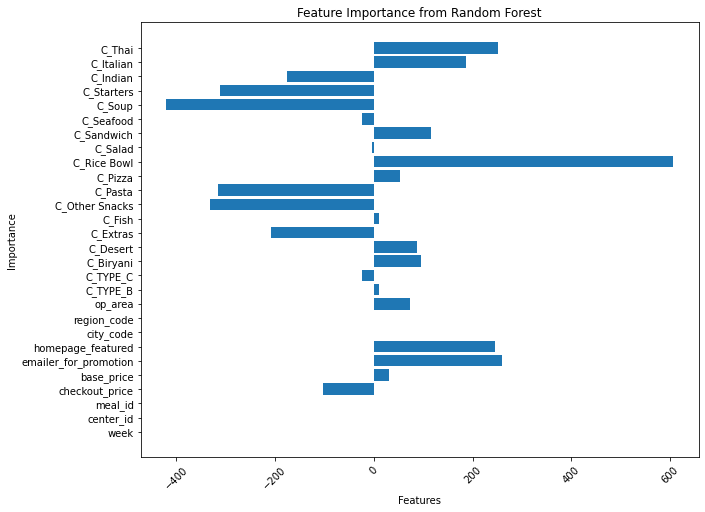

In [8]:
#Get the coefficients (feature importnace) of the linear regression model
coefficients=lr.coef_

#Plot the feature importance
columns=X_train.columns
plt.figure(figsize=(10,8))
plt.barh(columns, coefficients[0])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45)
plt.show()

checkout_price:indicating a significant negative impact of the checkout price on number of orders. 

emailer_for_promotion and homepage_featured: indicating a substantial positive impact of them on number of ordedrs.

op_area: suggesting a moderate positive impact of the operating area on numnber of orders.

C_TYPE_B, C_Biryani, ... C_Thai: These are categorical variables representing different types of cuisine, meal categories, or center types. The coefficients for these variables represent their impact relative to the reference category. Positive coefficients indicate a positive impact on the number of orders relative to the reference category, while negative coefficients indicate a negative impact.

Overall, features with higher absolute coefficients have a greater impact on the target variable.

#### Define a new linear regression model to select a K best number of features 

In [65]:
# Create a pipeline with feature selection and linear regression
pipe = Pipeline([
    ('selector', SelectKBest(score_func=f_regression)),
    ('regression', LinearRegression())])
#train the model on the training data
pipe.fit(X_train, y_train)
# Make predictions on the test set
y_pred=pipe.predict(X_test)
# Print the mean squared/absolute error and R2 for the best model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 106768.90485123357
Mean Absolute Error: 178.98176207396642
R2 score:  0.356204974553058


#### Cross-validation 

In [66]:
# Create a pipeline with feature selection and linear regression
pipe = Pipeline([
    ('selector', SelectKBest(score_func=f_regression)),
    ('regression', LinearRegression())])
#train the model on the training data
pipe.fit(X_train, y_train)
# Make predictions on the test set
y_pred=pipe.predict(X_test)
# Print the mean squared/absolute error and R2 for the best model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 106768.90485123357
Mean Absolute Error: 178.98176207396642
R2 score:  0.356204974553058


In [54]:
#mean
np.mean(cv_score)

0.3632285170856965

When feature selection was applied, the model's performance slightly declined compared to linear regression. 
Cross-validation yielded consistent results with the feature-selected model, indicating that the model's performance was robust across different subsets of the data.

In summary, while the feature-selected model exhibited slightly worse performance compared to the initial model, it maintained consistency through cross-validation. This suggests that the selected features may capture essential information for prediction while reducing model complexity.

### Hyperparameter Tuning

Hyperparameter tuning is a crucial step in building machine learning models to improve their performance. 

In [9]:
#define a function to train the model on training data, make predictions on the test set using the best model,
#and print the results for the best model
def hypertuningresult(parameters,model):
#train the model on the training data
    start_time = time.time()
    model.fit(X_train,y_train)
    duration = time.time() - start_time

#print the best hyperparameters
    print('Best hyperparameter: ',model.best_params_)

# Make predictions on the test set using the best model
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)

# Print the mean squared/absolute error and R2 for the best model
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R2 score: ", r2_score(y_test,y_pred))
    print('computation time: %.2f' % duration)

#### GridSearchCV

In [41]:
# Create a pipeline with feature selection and linear regression
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_regression)),
    ('regression', LinearRegression())])

#Define the range of k and parameter grid for GridSearchCV 
k=[k+1 for k in range(len(X_train.columns))]
grid_params={'selector__k':k}

#Perform GridSerach
lr_grid_cv=GridSearchCV(pipeline,grid_params,cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
lr_grid_cv.fit(X_train,y_train)

# Get the best parameters and best score
hypertuningresult(grid_params,lr_grid_cv)

/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best hyperparameter:  {'selector__k': 28}
Mean Squared Error: 98128.27993332643
Mean Absolute Error: 164.82884750415218
R2 score:  0.4083062052124192
computation time: 15.09


The model exhibits similar predictive performance in terms of R2 score, MAE, and MSE. Consequently, the feature selection technique employing SelectKBest with GridSearchCV did not enhance the linear regression model's performance in this scenario. Thus, opting for the simpler model without feature selection is preferable.

#### Regulization using GridSearchCV

Now we want to use regulization techniques to prevent overfitting in the linear regression model by adding penalty term to the loss function. 

#### Ridge Regression (L2 Regularization)

Ridge regression penalize large coefficients. 

In [67]:
# list of alpha to tune
grid_params = {'alpha': [ 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()

# Defining GridSearchCV (cross validation folds as 5)
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=grid_params,
                       scoring='neg_mean_squared_error',
                       cv=5, n_jobs=-1)

hypertuningresult(grid_params,grid_cv_model)


Best hyperparameter:  {'alpha': 1.0}
Mean Squared Error: 98128.2980807239
Mean Absolute Error: 164.8250774075503
R2 score:  0.40830609578726185
computation time: 5.24




Despite the hyperparameter adjustment, there was no significant impact on MSE or R2. The next step involved exploring Lasso regression.



#### Lasso Regression (L2 Regularization):

Lasso performs feature selection. It shrinks the coefficients of less important features to zero. Features which are not shrunk to zero are selected by Lasso. 

In [11]:
#Initializing Lasso()
lasso_reg=Lasso()

# Defining GridSearchCV and fiting GridSearchCV() with X_train and y_train
grid_cv_model=GridSearchCV(estimator=lasso_reg, param_grid=grid_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_cv_model.fit(X_train,y_train)

hypertuningresult(grid_params,grid_cv_model)

Best hyperparameter:  {'alpha': 0.0001}
Mean Squared Error: 98128.2798787315
Mean Absolute Error: 164.82842605659798
R2 score:  0.4083062055416157
computation time: 21.60


Similar to the Ridge regression results, the hyperparameter adjustment in Lasso regression did not result in a significant change in Mean Squared Error (MSE) or R2 score. As a result, considering the minimal improvement achieved through regularization techniques, the simpler linear regression model remains a better choice for predicting the 'Number of Orders'. To further enhance model performance and reduce MSE, we proceed with the implementation of a Decision Tree Regressor in the next step.

## 2-Decision Tree Regressor

In [68]:
#creat a decision tree regressor
DTRModel= DecisionTreeRegressor(random_state=42)

#train the model on the training data
DTRModel.fit(X_train,y_train)

#make prediction on the test set
y_pred=DTRModel.predict(X_test)

#evaluate the model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

Mean Squared Error: 44801.975660601485
Mean Absolute Error: 92.72407743924984
R2 score:  0.7298530962673169


#### Variable importance

We aim to conduct a feature importance analysis to assign a score to each feature within the dataset, where higher scores signify greater significance.

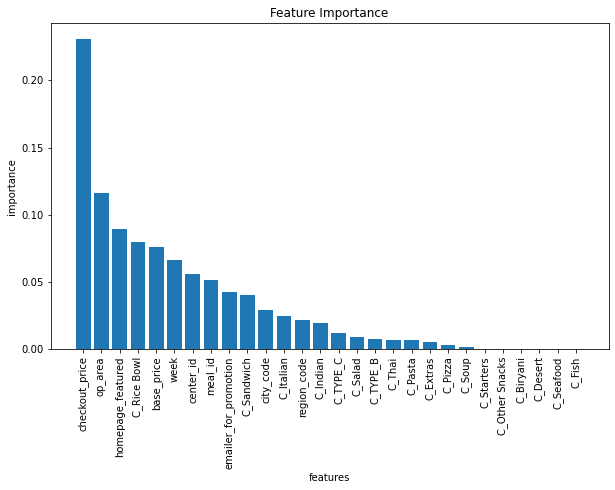

In [78]:
# Get feature importances
importances = DTRModel.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [X_train.columns[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

### Hyperparameter tunning

#### Grid Search

In [72]:
#setup hyperparameters range for tuning 
grid_param_DT={'max_depth':np.arange(1,21).tolist()[0::2],
               'min_samples_split':np.arange(2,11).tolist()[0::2],
               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}
# Defining GridSearchCV and fiting GridSearchCV() with X_train and y_train
grid_cv_DT=GridSearchCV(DecisionTreeRegressor(), param_grid=grid_param_DT, cv=5, n_jobs=-1)

hypertuningresult(grid_param_DT,grid_cv_DT)

Best hyperparameter:  {'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_split': 2}
Mean Squared Error: 81725.53952417546
Mean Absolute Error: 151.81600726734675
R2 score:  0.5072114313531454
computation time: 174.73


#### Randomised Search

In [70]:
# Defining RandomizedSearchCV
random_cv_DT = RandomizedSearchCV(DecisionTreeRegressor(), grid_param_DT, cv=5, n_iter=100, random_state=42, n_jobs=-1)

hypertuningresult(grid_param_DT,random_cv_DT)

Best hyperparameter:  {'min_samples_split': 10, 'max_leaf_nodes': 25, 'max_depth': 13}
Mean Squared Error: 81725.53952417546
Mean Absolute Error: 151.81600726734675
R2 score:  0.5072114313531454
computation time: 28.66


#### Bayesian Search

In [71]:
# Defining BayesianSearchCV
grid_param_DT={'max_depth': Integer(1,21,prior='log-uniform'),
              'min_samples_split': Real(1e-3,1.0,prior='uniform'),
              'max_leaf_nodes': Integer(3,26,prior='log-uniform')}
Bayes_cv_DT = BayesSearchCV(DecisionTreeRegressor(), grid_param_DT, cv=5, n_iter=100, random_state=42, n_jobs=-1)

hypertuningresult(grid_param_DT,Bayes_cv_DT)

/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  

Best hyperparameter:  OrderedDict([('max_depth', 21), ('max_leaf_nodes', 26), ('min_samples_split', 0.001)])
Mean Squared Error: 82476.14011644006
Mean Absolute Error: 151.03396301417732
R2 score:  0.502685460724611
computation time: 167.51


- The default decision tree model achieved the highest R2 score of 0.7299 and the lowest Mean Squared Error of 44,801.98. However, it's important to note that this model might suffer from overfitting.
- Both the grid search and randomized search tuned models produced similar results, with R2 scores of 0.5072 and identical mean squared errors. However, the grid search required significantly more computation time compared to the randomized search.
- The Bayesian search tuned model yielded a slightly lower R2 score compared to the grid and randomized search tuned models, with a higher mean squared error. However, it required less computation time compared to the grid search.
- Considering performance and computational efficiency, the default decision tree model appears favorable. However, it's worth noting that the randomized search approach may be optimal from a complexity standpoint. However, further evaluation and testing on unseen data may be necessary to fully validate the model's performance.

### Random Forest model

### Summary

AdaBoostRegressor
GradientBoostRegressor	